# SuperPoderosas

Índice:

1. Gestión de datos vacíos e imputación
2. Normalizar variables numéricas
3. Primera prueba

aaaaaaaaaaaaaaaaaa


4. Outliers
5. Numeración de las variables categóricas

6. Segunda prueba

aaaaaaaaa


3. Separación de datos de train en train_final y train_val
4. Normalizar variables numéricas
5. Estudio y extracción de características
6. Entrenamiento de modelos
7. Validación con datos de validación estudio de modelos
8. Uso de los datos de test y pasarlo a kaggle

    8. Reversión de modificaciones
9. Conclusiones del estudio

## 1. Gestión de datos vacíos e imputaciones

Carga de datos:

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

In [2]:
train_dataset = pd.read_csv('train.csv', header='infer')
test_dataset = pd.read_csv('test.csv', header='infer')

train_dataset.columns
#test_dataset



Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### 1.1 Gestión de datos vacíos

In [5]:
#  Busca valores nulos en training.
train_data_null_values = train_dataset.isnull().sum(axis=0)

train_null_val = train_data_null_values[train_data_null_values > 0 ]
#print(train_null_val)

#print("-------------")
#  Busca valores nulos en training.
test_data_null_values = test_dataset.isnull().sum(axis=0)

test_null_val = test_data_null_values[test_data_null_values > 0 ]
#print(test_null_val)

total_null_dataset = train_null_val.fillna(0).add(test_null_val.fillna(0), fill_value=0)
total_null_dataset

# 

BsmtFinSF1        1.0
BsmtFinSF2        1.0
BsmtFullBath      2.0
BsmtHalfBath      2.0
BsmtUnfSF         1.0
Electrical        1.0
Exterior1st       1.0
Exterior2nd       1.0
Functional        2.0
GarageArea        1.0
GarageCars        1.0
KitchenQual       1.0
LotFrontage     486.0
MSZoning          4.0
MasVnrArea       23.0
SaleType          1.0
TotalBsmtSF       1.0
Utilities         2.0
dtype: float64

##### Visualización de valores faltantes

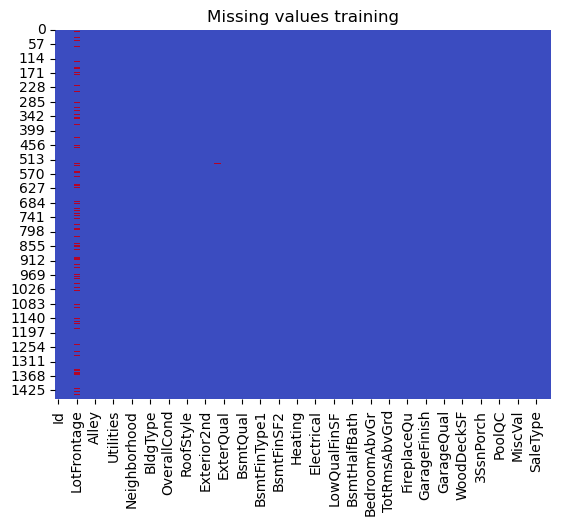

In [6]:
matriz_train_null = train_dataset.isnull()
sns.heatmap(matriz_train_null, cbar=False, cmap='coolwarm')
plt.title("Missing values training")
plt.show()

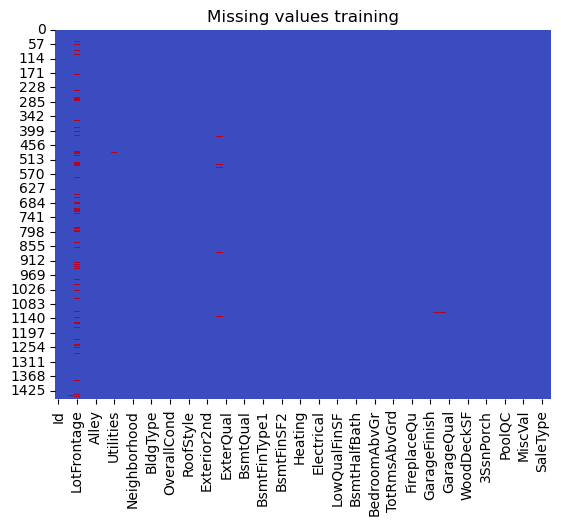

In [7]:
matriz_test_null = test_dataset.isnull()
sns.heatmap(matriz_test_null, cbar=False, cmap='coolwarm')
plt.title("Missing values training")
plt.show()

Se procede a realizar un estudio de las siguientes variables para determinar qué realizar con los valores faltantes. Para ello se procederá a eliminar todas las filas con una tasa de NaN inferior al 1% (es decir, menos de 29 valores nulos)

https://www.kaggle.com/code/asyaaatru/sale-price-as-detailed-as-possible

Las columnas con 29 o menos NaN son las siguientes. Se procederá a la eliminación completa de la fila correspondiente al valor faltante: 
- BsmtFinSF1         1.0 - Filas eliminadas (Cantidad menor al umbral)
- BsmtFinSF2         1.0 - Filas eliminadas (Cantidad menor al umbral)
- BsmtFullBath       2.0 - Filas eliminadas (Cantidad menor al umbral)
- BsmtHalfBath       2.0 - Filas eliminadas (Cantidad menor al umbral)
- BsmtUnfSF          1.0 - Filas eliminadas (Cantidad menor al umbral)
- Electrical         1.0 - Filas eliminadas (Cantidad menor al umbral)
- Exterior1st        1.0 - Filas eliminadas (Cantidad menor al umbral)
- Exterior2nd        1.0 - Filas eliminadas (Cantidad menor al umbral)
- Functional         2.0 - Filas eliminadas (Cantidad menor al umbral)
- GarageArea         1.0 - Filas eliminadas (Cantidad menor al umbral)
- GarageCars         1.0 - Filas eliminadas (Cantidad menor al umbral)
- KitchenQual        1.0 - Filas eliminadas (Cantidad menor al umbral)
- MSZoning           4.0 - Filas eliminadas (Cantidad menor al umbral)
- MasVnrArea        23.0 - Filas eliminadas (Cantidad menor al umbral)
- SaleType           1.0 - Filas eliminadas (Cantidad menor al umbral)
- TotalBsmtSF        1.0 - Filas eliminadas (Cantidad menor al umbral)
- Utilities          2.0 - Filas eliminadas (Cantidad menor al umbral)

Una vez filtrados, estudiaremos los datos con NaN restantes uno a uno, decidiendo si eliminar o imputar:

- Alley           2721.0 - Considerado como "Cantidad = 0"
- BsmtCond          82.0 - Considerado como "Cantidad = 0"
- BsmtExposure      82.0 - Considerado como "Cantidad = 0"
- BsmtFinType1      79.0 - Considerado como "Cantidad = 0"
- BsmtFinType2      80.0 - Considerado como "Cantidad = 0"
- BsmtQual          81.0 - Considerado como "Cantidad = 0"
- Fence           2348.0 - Considerado como "Cantidad = 0"
- FireplaceQu     1420.0 - Considerado como "Cantidad = 0"
- GarageCond       159.0 - Considerado como "Cantidad = 0"
- GarageFinish     159.0 - Considerado como "Cantidad = 0"
- GarageQual       159.0 - Considerado como "Cantidad = 0"
- GarageType       157.0 - Considerado como "Cantidad = 0"
- GarageYrBlt      159.0 - Considerado como "Cantidad = 0" --> en test hay dos que no tienen sentido
- LotFrontage      486.0 - Valor faltante
- MasVnrType      1766.0 - Considerado como "Cantidad = 0"
- MiscFeature     2814.0 - Considerado como "Cantidad = 0"
- PoolQC          2909.0 - Considerado como "Cantidad = 0"

De las variables con NaN, solo en "LotFrontage" y "MasVnrType" se han considerado que los NaN hacen referencia a datos vacíos. Se procederán a descartar las columnas por las siguientes razones:
 - En "LotFrontage" hay un 16.7% de datos faltantes, por lo que se procedió a analizar su relevancia. Tras un riguroso análisis se consideró poco relevante y se eliminó del modelo final(Fuete: la de los deseos)

#### 1.2 Tratamiento de missing values

- Vamos a cambiar los NaN que hacen referencia a una clase en una variable categórica o a un valor en una numérica.
- Los NaN que son realmente valores faltantes, como son una proporción muy pequeña, vamos a eliminar las filas donde se encuentran (o imputar sus valores).

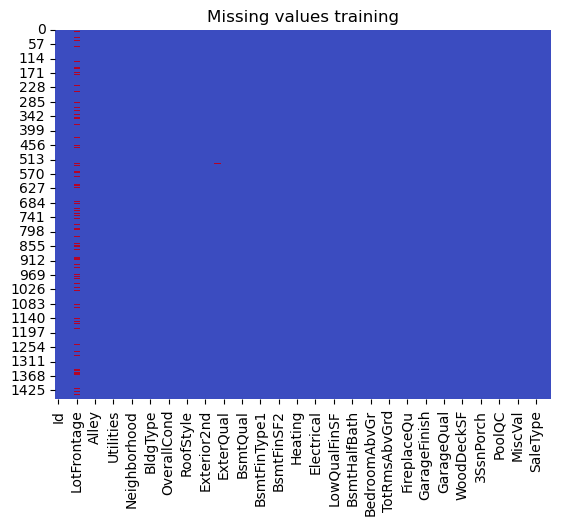

In [8]:
caract_clase_NA = ['Alley','MasVnrType','BsmtQual','GarageYrBlt','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

# Cambiamos el valor nan por una clase 'No hay'
for caract in caract_clase_NA:
    train_dataset[caract] = train_dataset[caract].fillna('0')
    test_dataset[caract] = test_dataset[caract].fillna('0')


matriz_train_null = train_dataset.isnull()
sns.heatmap(matriz_train_null, cbar=False, cmap='coolwarm')
plt.title("Missing values training")
plt.show()


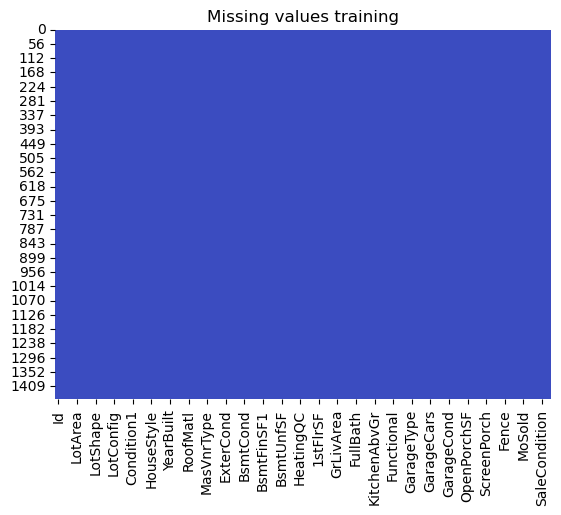

Series([], dtype: int64)

In [9]:
# Variables con "True NaN"
caract_nan = ['LotFrontage','MasVnrArea','Electrical','MSZoning','Utilities','Exterior1st','Exterior2nd','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','KitchenQual','Functional','GarageCars','GarageArea','SaleType']

# Borramos las filas que contienen valores NaN no equivalentes a 0
umbral = 0.01*(train_dataset.shape[0]+test_dataset.shape[0]) # si es el 1% del total de datos se borra la fila

for caract1 in caract_nan:
    if 0<train_data_null_values[caract1] <= umbral:
        train_dataset = train_dataset.dropna(subset=[caract1])
    if 0<test_data_null_values[caract1] <= umbral:
        test_dataset = test_dataset.dropna(subset=[caract1]) # borrar fila si la columna caract1 tiene NaN

# FALTA ELIMINAR COLUMNAS Y/O IMPUTAR      


for df in [train_dataset, test_dataset]:
    if "LotFrontage" in df.columns:
        df.drop(columns=["LotFrontage"], inplace=True)

matriz_train_null = train_dataset.isnull()
sns.heatmap(matriz_train_null, cbar=False, cmap='coolwarm')
plt.title("Missing values training")
plt.show()

train_dataset.isnull().sum(axis=0)[train_dataset.isnull().sum(axis=0) > 0]

## 2. Normalización de datos numéricos

Obtención de datos numéricos

In [10]:
numerical_values=train_dataset[[
    "MSSubClass", "LotArea", "OverallQual", "OverallCond", "YearBuilt",
    "YearRemodAdd", "MasVnrArea" , "TotalBsmtSF",
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath",
    "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold"]]
#"BsmtFinSF1"
#"BsmtFinSF2"
#"BsmtUnfSF"
# Lista de características de propiedades con comentarios explicativos

numerical_values_test=test_dataset[[
    "MSSubClass", "LotArea", "OverallQual", "OverallCond", "YearBuilt",
    "YearRemodAdd", "MasVnrArea" , "TotalBsmtSF",
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath",
    "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold"]]

Normalización

In [11]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()

# Lo dice Samnsung
X_train_robust = rbs.fit_transform(numerical_values)
X_test_robust = rbs.fit_transform(numerical_values_test)

X_test_robust

array([[-6.00000000e-01,  5.47768374e-01, -5.00000000e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-6.00000000e-01,  1.19198685e+00,  0.00000000e+00, ...,
         1.25000000e+04,  0.00000000e+00,  1.00000000e+00],
       [ 2.00000000e-01,  1.08555075e+00, -5.00000000e-01, ...,
         0.00000000e+00, -7.50000000e-01,  1.00000000e+00],
       ...,
       [-6.00000000e-01,  2.58832126e+00, -5.00000000e-01, ...,
         0.00000000e+00,  7.50000000e-01, -1.00000000e+00],
       [ 7.00000000e-01,  2.60122998e-01, -5.00000000e-01, ...,
         7.00000000e+02,  2.50000000e-01, -1.00000000e+00],
       [ 2.00000000e-01,  6.18644584e-02,  5.00000000e-01, ...,
         0.00000000e+00,  1.25000000e+00, -1.00000000e+00]])

## 3 Primera versión
Se procederá a realizar un modelo usando como datos las variables numéricos para ver el comportamiento inicial del modelo. Los modelos a entrenar son los siguientes:
- Regresión lineal 
- Random forest


In [16]:
# Regresion lineal con variables numéricas:

lr = LinearRegression()

lr.fit(X_train_robust, train_dataset[["SalePrice"]])
predY = lr.predict(X_train_robust)

print(predY.size)

a= metrics.mean_squared_error(train_dataset[["SalePrice"]], predY)
print(np.sqrt(a))


# Mostrar features ordenadas

features = [
    "MSSubClass", "LotArea", "OverallQual", "OverallCond", "YearBuilt",
    "YearRemodAdd", "MasVnrArea", "TotalBsmtSF",
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath",
    "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold"
]

coef_dict = dict(zip(features, lr.coef_.ravel()))
coef_dict = {k: abs(v) for k, v in coef_dict.items()} # Valor absoluto

sorted_keys = sorted(coef_dict, key=coef_dict.get, reverse=True) # Ordenado de mayor a menor
sorted_keys



1451
34083.44853690971


['OverallQual',
 'GrLivArea',
 'YearBuilt',
 'KitchenAbvGr',
 'GarageCars',
 'BsmtFullBath',
 '2ndFlrSF',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'MSSubClass',
 '1stFlrSF',
 'TotalBsmtSF',
 'OverallCond',
 'MasVnrArea',
 'Fireplaces',
 'BsmtHalfBath',
 'WoodDeckSF',
 'YearRemodAdd',
 'FullBath',
 'HalfBath',
 'GarageArea',
 'LotArea',
 'YrSold',
 'OpenPorchSF',
 'GarageYrBlt',
 'MoSold',
 'ScreenPorch',
 'PoolArea',
 '3SsnPorch',
 'LowQualFinSF',
 'EnclosedPorch',
 'MiscVal']

In [ ]:
# Random forest con variables numéricas:

RFC = RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_leaf=2,random_state=123)
RFC.fit(X_train_robust, train_dataset[["SalePrice"]])
predY = RFC.predict(X_train_robust)


a= metrics.mean_squared_error(train_dataset[["SalePrice"]], predY)
print(np.sqrt(a))


# Mostrar features ordenadas

features = [
    "MSSubClass", "LotArea", "OverallQual", "OverallCond", "YearBuilt",
    "YearRemodAdd", "MasVnrArea", "TotalBsmtSF",
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath",
    "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold"
]

coef_dict = dict(zip(features, RFC.coef_.ravel()))
coef_dict = {k: abs(v) for k, v in coef_dict.items()} # Valor absoluto

sorted_keys = sorted(coef_dict, key=coef_dict.get, reverse=True) # Ordenado de mayor a menor
sorted_keys


NameError: name 'X_train' is not defined

#### 1.3 Outliers


Se crea un boxplots de solo las variables numericas para identificar posibles outlayers
Valores como 
BsmtFinSF1+BsmtFinSF2+BsmtUnfSF = TotalBsmtSF (Por lo que se mantiene Total y se eliminan para disminuir complejidad)


In [ ]:
house_features = [
    "MSSubClass",     # Tipo de construcción de la propiedad
    "LotFrontage",    # Metros lineales de frente del terreno
    "LotArea",        # Superficie total del terreno (pies cuadrados) 
    "OverallQual",    # Calidad general de la propiedad (escala 1-10)
    "OverallCond",    # Condición general de la propiedad (escala 1-10)
    "YearBuilt",      # Año de construcción
    "YearRemodAdd",   # Año de remodelación o adición
    "MasVnrArea",     # Área de revestimiento de mampostería (piedra/brick)
    "TotalBsmtSF",    # Superficie total del sótano
    "1stFlrSF",       # Superficie del primer piso
    "2ndFlrSF",       # Superficie del segundo piso
    "LowQualFinSF",   # Superficie de acabado de baja calidad
    "GrLivArea",      # Área habitable por encima del nivel del suelo
    "BsmtFullBath",   # Número de baños completos en el sótano
    "BsmtHalfBath",   # Número de medios baños en el sótano
    "FullBath",       # Número de baños completos arriba del nivel del suelo
    "HalfBath",       # Número de medios baños arriba del nivel del suelo
    "BedroomAbvGr",   # Número de dormitorios sobre el nivel del suelo
    "KitchenAbvGr",   # Número de cocinas sobre el nivel del suelo
    "TotRmsAbvGrd",   # Número total de habitaciones sobre el nivel del suelo (sin contar baños)
    "Fireplaces",     # Número de chimeneas
    "GarageYrBlt",    # Año de construcción del garaje
    "GarageCars",     # Capacidad de autos del garaje
    "GarageArea",     # Área del garaje
    "WoodDeckSF",     # Área del deck de madera
    "OpenPorchSF",    # Área del porch abierto
    "EnclosedPorch",  # Área del porch cerrado
    "3SsnPorch",      # Área del porch de 3 estaciones
    "ScreenPorch",    # Área del porch con malla
    "PoolArea",       # Área de la piscina
    "MiscVal",        # Valor de otras mejoras
    "MoSold",         # Mes de venta
    "YrSold"          # Año de venta
]


print(numerical_values.shape)

# Aplanar axes para iterar fácilmente
# Número de filas y columnas del grid
n_cols = 6
n_rows = 6

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows))
axes = axes.flatten()  # Convertir a 1D para iterar fácilmente
axes = axes.flatten()

# Crear un boxplot por cada columna
for i, col in enumerate(numerical_values.columns):
    sns.boxplot(y=numerical_values[col], ax=axes[i])
    axes[i].set_title(i, fontsize=0.1)

plt.show()

KeyError: "['MSSubClass', 'MiscVal'] not in index"

La verdad iba a eliminar varias variables o outlayesrs pero viendo por encima solo quitaria la de Porch Malla porque las otras si puede que afecten el resultado, asi que por eso he decidido dejarlas.

Ahora un review de correlación para ver si hay datos redundantes


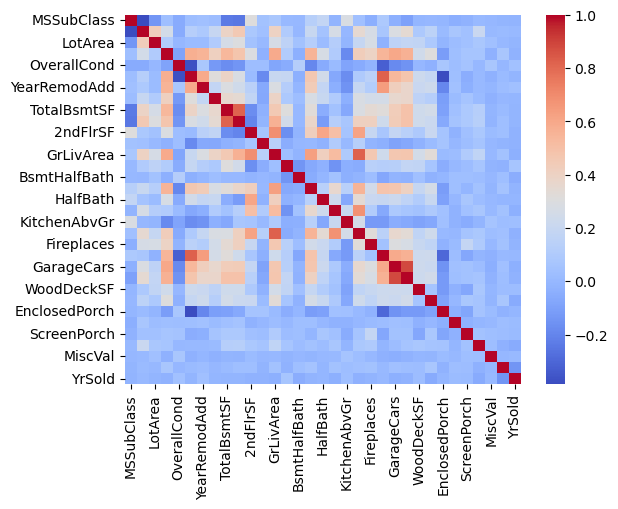

In [ ]:
Q: sns.heatmap(numerical_values.corr(),cmap='coolwarm')
plt.show()

Principalmente en contrarios es el estado actual vs el año de remodelacion lo cual tiene logica y el de la cantidad de garajes y area de madera lo cual esta relacionado pero no je que tanto tiene que ver

# NUMERACIÓN CARACTERÍSTICAS CATEGÓRICAS

In [79]:
caract_categoricas_nominales = ['MSSubClass','MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','GarageType','MiscFeature','MiscVal','SaleType','SaleCondition']
for caract in caract_categoricas_nominales:
    train_dataset = pd.get_dummies(train_dataset[caract], drop_first=True, prefix=caract).join(train_dataset.drop(columns=[caract]))

caract_categoricas_ordinales = ['LotShape','Utilities','LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']


# PARTICIÓN DE DATOS

# EXTRACCIÓN CARACTERÍSTICAS

1. Creación de nuevas caracteríticas mediante combinación lineal de las existentes

In [ ]:
# Total metros cuadrados
train_dataset['TotalSF'] = train_dataset['TotalBsmtSF'] + train_dataset['1stFlrSF'] + train_dataset['2ndFlrSF']
test_dataset['TotalSF'] = test_dataset['TotalBsmtSF'] + test_dataset['1stFlrSF'] + test_dataset['2ndFlrSF']

# Total baños
train_dataset['TotalBath'] = train_dataset['FullBath'] + 0.5*train_dataset['HalfBath'] + train_dataset['BsmtFullBath'] + 0.5*train_dataset['BsmtHalfBath']
test_dataset['TotalBath'] = test_dataset['FullBath'] + 0.5*test_dataset['HalfBath'] + test_dataset['BsmtFullBath'] + 0.5*test_dataset['BsmtHalfBath']

# Años casa
train_dataset['HouseAge'] = train_dataset['YrSold'] - train_dataset['YearBuilt']
test_dataset['HouseAge'] = test_dataset['YrSold'] - test_dataset['YearBuilt']

# Año desde remodelación
train_dataset['YearSinceRemod'] = train_dataset['YrSold'] - train_dataset['YearRemodAdd']
test_dataset['YearSinceRemod'] = test_dataset['YrSold'] - test_dataset['YearRemodAdd']

# Condición de la casa por los m^2
train_dataset['OverallCond_TotalSF'] = train_dataset['OverallCond'] * train_dataset['TotalSF']
test_dataset['OverallCond_TotalSF'] = test_dataset['OverallCond'] * test_dataset['TotalSF']

2. Se podría hacer un PCA (si da tiempo y se entiende, a priori no lo haría)

# SELECCIÓN CARACTERÍSTICAS

# ENTRENAMIENTO DE MODELOS

#### Versión 2 (ANDRES)
Se procederá a realizar un modelo usando como datos las variables numéricos para ver el comportamiento inicial del modelo. Los modelos a entrenar son los siguientes:
- Regresión lineal 
- Random forest
